# 1. Organizing Images

In [21]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import choice 

import os
os.chdir('C:/Users/LOTLOUISCHO/Desktop/02MyProjects/ktx_project')

from skimage.io import imread

In [22]:
#0 means KTX-1
#1 means KTX-Sancheon
#2 means KTX-EUM
#3 means SRT
hsr0 = []
hsr1 = []
hsr2 = []
hsr3 = []

In [23]:
for classes in os.listdir('trains'):
    route = 'trains/'+classes+'/'
    for path in os.listdir(route):
        if classes == 'ktx_1':
            hsr0.append(route+path)
        elif classes == 'ktx_sancheon':
            hsr1.append(route+path)
        elif classes == 'ktx_eum':
            hsr2.append(route+path)
        elif classes == 'srt':
            hsr3.append(route+path)

In [24]:
print('KTX-1:',len(hsr0))
print('KTX-Sancheon:',len(hsr1))
print('KTX-EUM:',len(hsr2))
print('SRT:',len(hsr3))

KTX-1: 10
KTX-Sancheon: 10
KTX-EUM: 10
SRT: 10


# 2. Exploratory Data Analysis

In [25]:
def explore(hsr,hsr_type):
    fig,axes = plt.subplots(figsize=(30,35))
    random_image = [choice(hsr)for x in range(0,11)] #print 10 images randomly

    for i in range(0,len(random_image)):
        img = imread(random_image[i])
        plt.imshow(img)
        axes =plt.subplot(5,5,i+1)
        axes.set_title(hsr_type + str(i+1),fontsize=20) 

    fig.delaxes(axes)
    fig.suptitle(hsr_type,fontsize=35)
    fig.suptitle

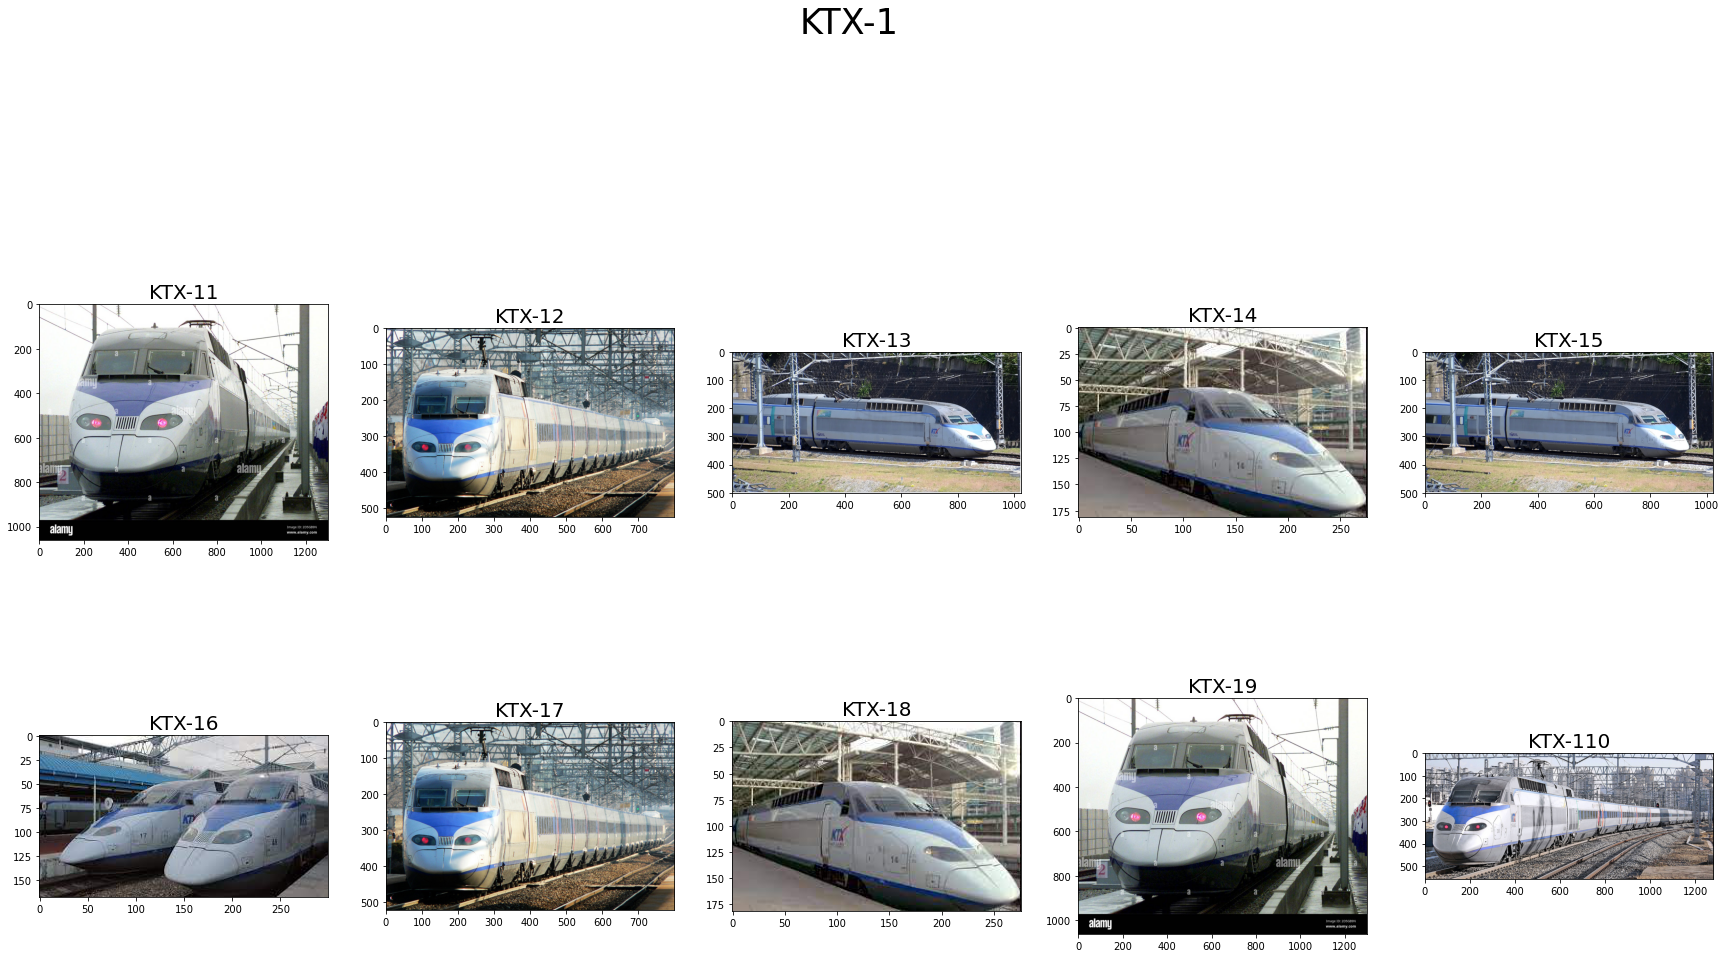

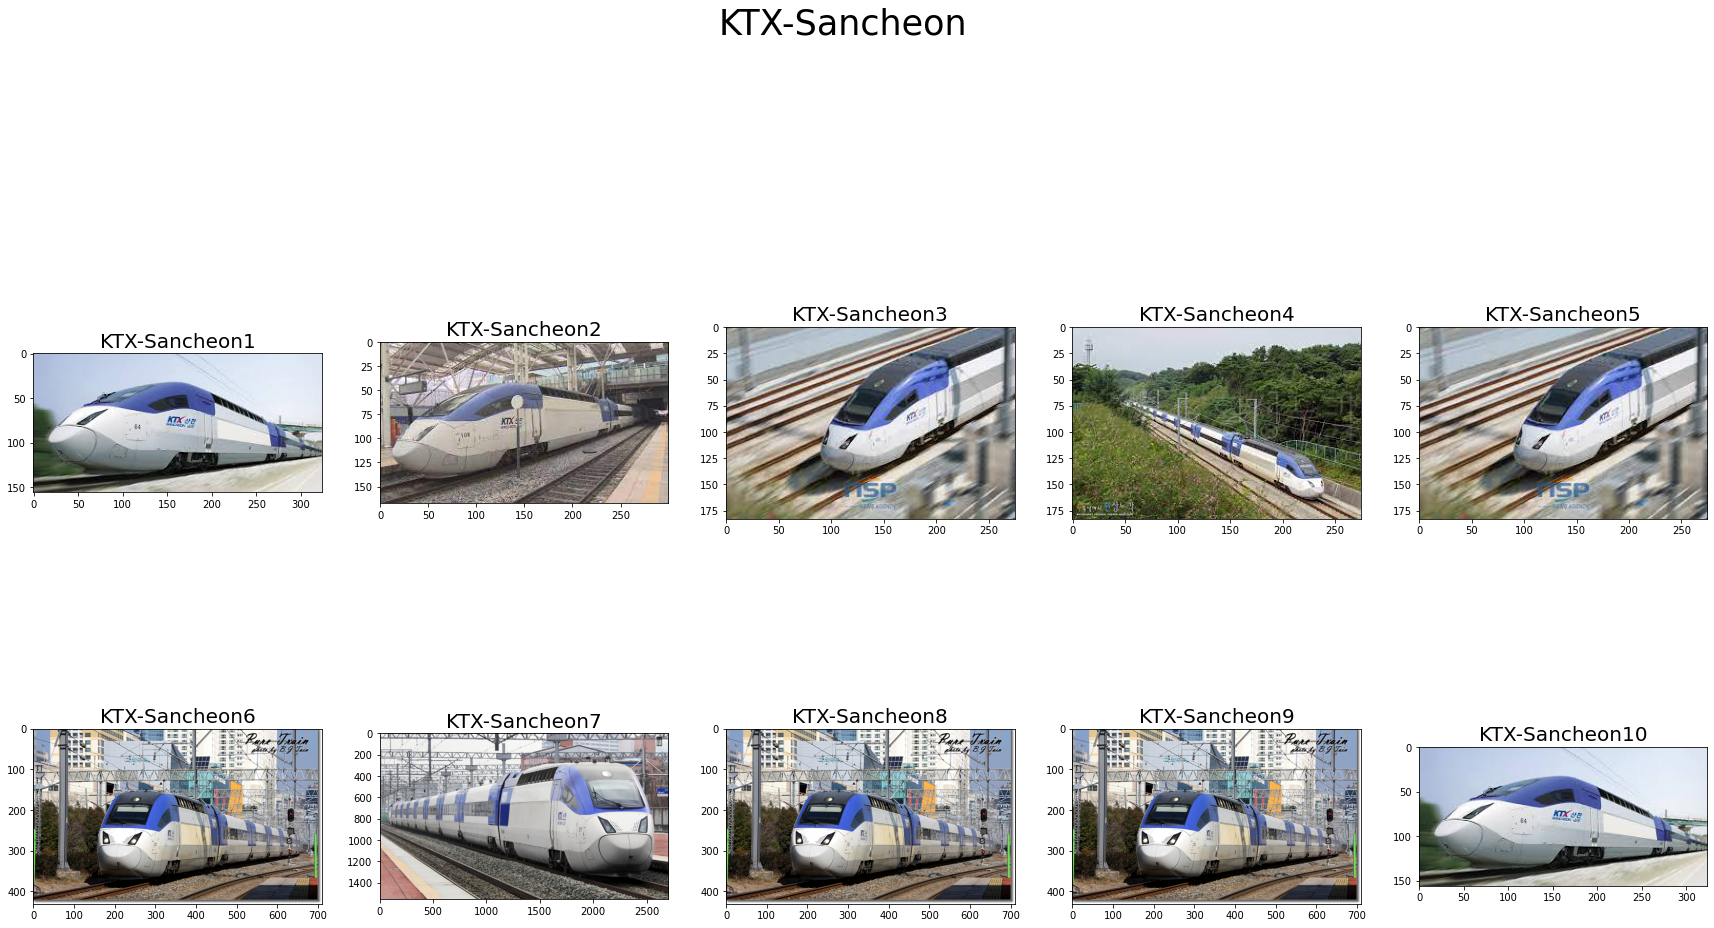

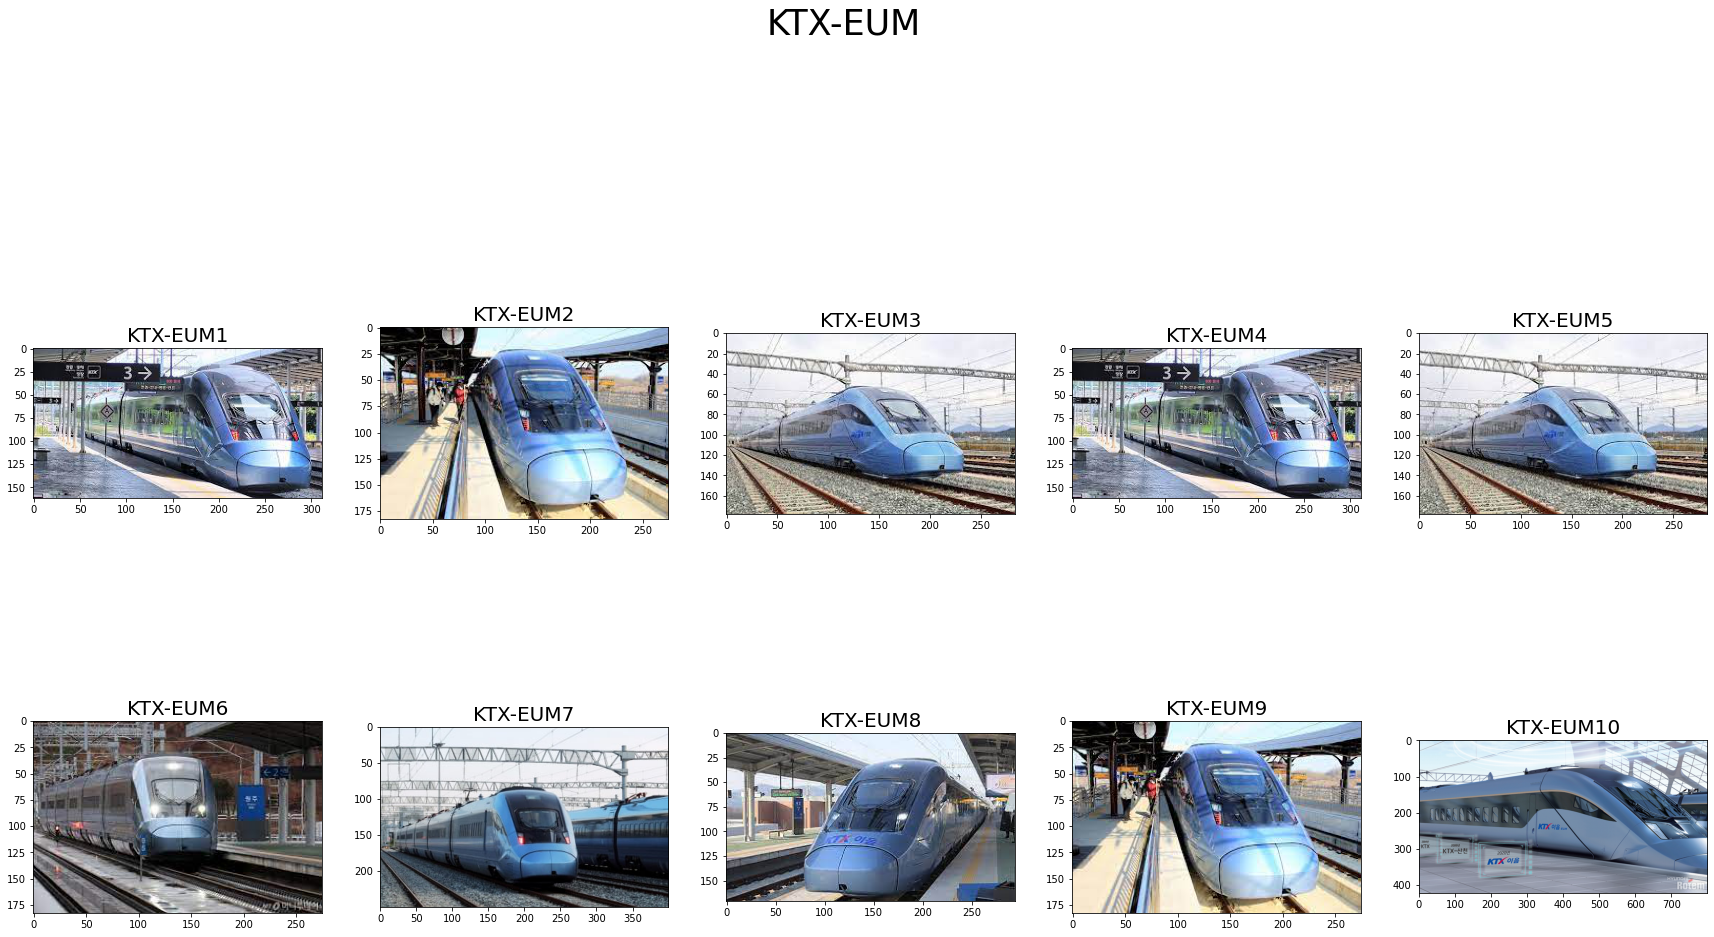

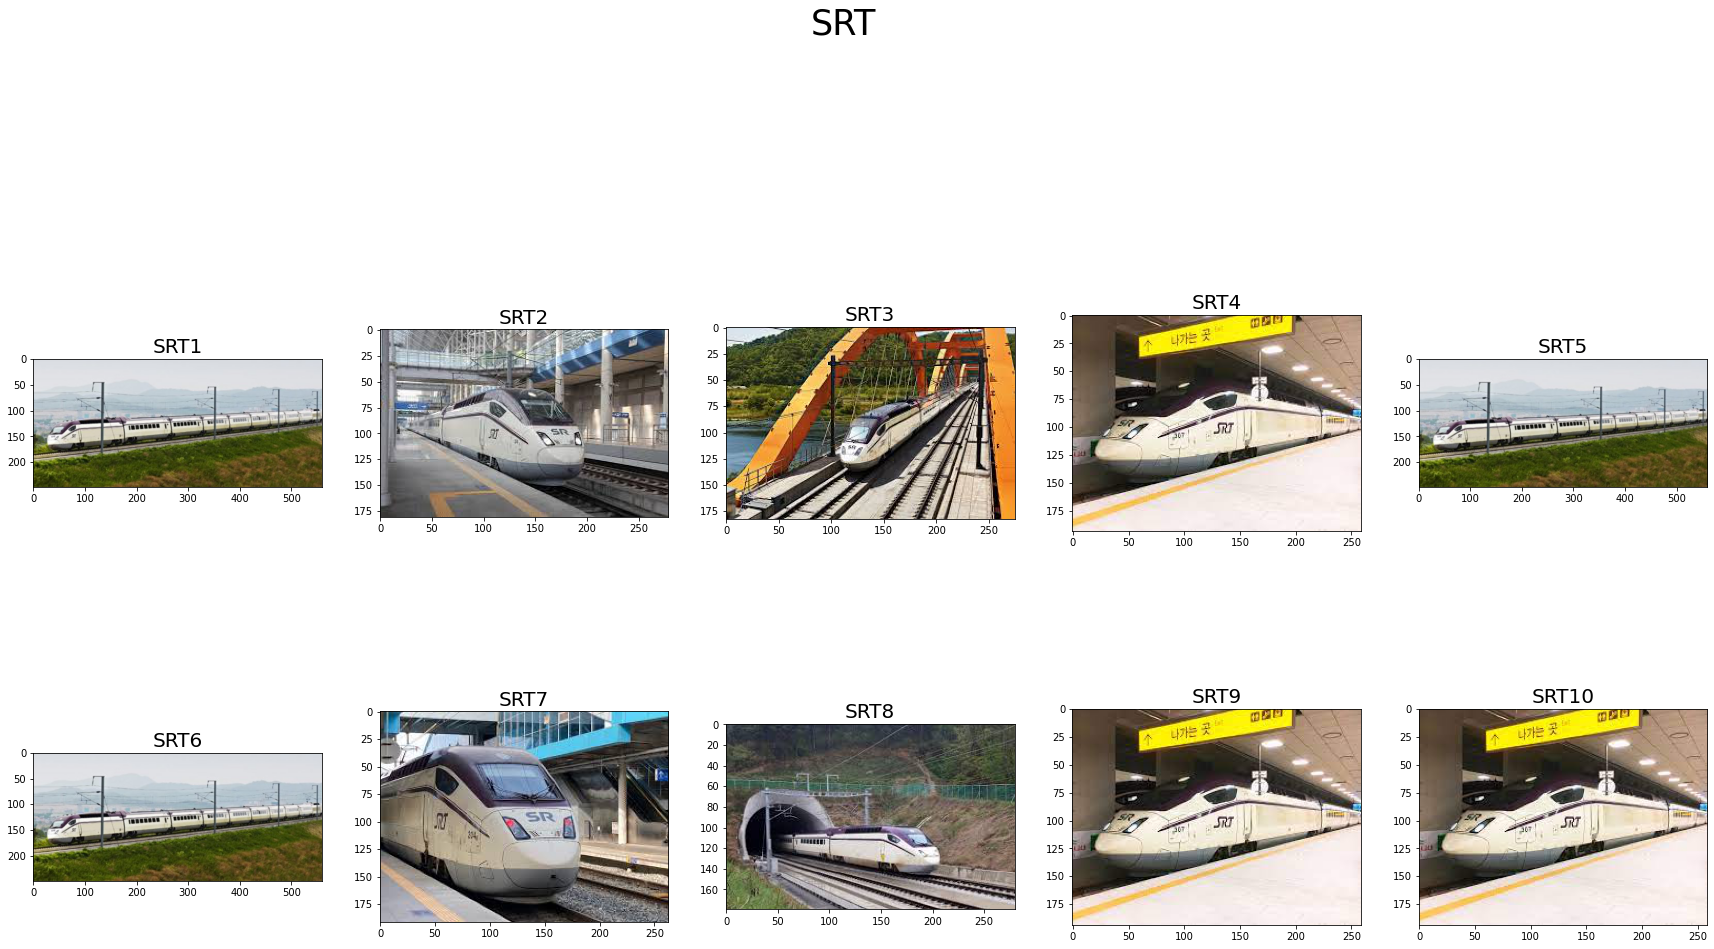

In [26]:
#display grid of images
train_types = ['KTX-1','KTX-Sancheon','KTX-EUM','SRT']
hsr = [hsr0,hsr1,hsr2,hsr3]
count = 0
for h in hsr:
    explore(h,train_types[count])
    count +=1

# 3. Create Training and Testing Image Datasets

In [27]:
batch_size = 32 #number of training examples used in one iteration
img_height = 225 #height of our image
img_width = 225 #width of our image
training_data = tf.keras.preprocessing.image_dataset_from_directory(
  './trains',
validation_split=0.2, #training and testing images are split around 80-20%
subset="training", #we are going to 'train' these datasets
seed=150, #random seed number
image_size=(img_height, img_width), #adjust the image size
batch_size=batch_size) #given batch size

Found 40 files belonging to 4 classes.
Using 32 files for training.


In [28]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  './trains',
validation_split=0.2,
subset="validation", #we are going to 'test' these datasets
seed=150, #random seed number
image_size=(img_height, img_width),
batch_size=batch_size)

Found 40 files belonging to 4 classes.
Using 8 files for validation.


In [29]:
#Shuffle all the hsr image data
AUTOTUNE = tf.data.AUTOTUNE
training_data = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
#Rescale the input layer before the datasets are given into our neural network model
normalized_layer = layers.experimental.preprocessing.Rescaling(1./255)

# 4. CNN Model Creation

In [31]:
num_classes = 4 #There are 4 types of Korean high-speed trains

#Setting up layers of our neural network using the relu activation function
cnn = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
#recording accuracy of the model
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 225, 225, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 225, 225, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [34]:
epochs=10
model_history = cnn.fit(
  training_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.4047 - accuracy: 0.2812 - val_loss: 8.0270 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 579ms/step - loss: 4.3511 - accuracy: 0.3125 - val_loss: 4.0311 - val_accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 1s 563ms/step - loss: 3.1023 - accuracy: 0.2812 - val_loss: 2.9278 - val_accuracy: 0.1250
Epoch 4/10
1/1 [==============================] - 1s 537ms/step - loss: 2.6064 - accuracy: 0.2812 - val_loss: 1.5340 - val_accuracy: 0.1250
Epoch 5/10
1/1 [==============================] - 1s 541ms/step - loss: 1.5441 - accuracy: 0.2812 - val_loss: 1.2134 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 530ms/step - loss: 1.2160 - accuracy: 0.5312 - val_loss: 1.3889 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 538ms/step - loss: 1.1292 - accuracy: 0.4062 - val_loss: 1.6144 - val_accuracy: 0.0000e+00
Epoch 8/10


In [35]:
training_acc = model_history.history['accuracy'] #training accuracy
testing_acc = model_history.history['val_accuracy'] #test accuracy

training_loss = model_history.history['loss'] #training loss
testing_loss = model_history.history['val_loss'] #test loss

x = range(epochs)

<Figure size 432x288 with 0 Axes>

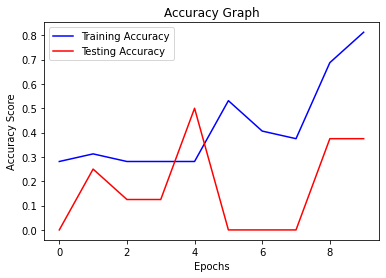

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(x,training_acc,'b',label='Training Accuracy')
plt.plot(x, testing_acc, 'r', label='Testing Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

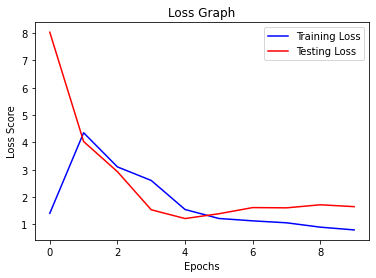

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(x,training_loss,'b',label='Training Loss')
plt.plot(x, testing_loss, 'r', label='Testing Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.legend()
plt.figure()

# Predicting with Given Images

In [ ]:
#